In [22]:
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import math
import numpy as np
import imageio


def load_all_fitnesses(filename,obj) :
    with open(filename) as file :
        csv_data = csv.reader(file,delimiter=',')
        best_fitnesses = []
        avg_fitnesses = []
        pop_size= []
        nb_eval = []
        nb_eval_tot = 0
        for row in csv_data :
            best_fitness = 0
            avg_fitness = 0
            nb_eval_tot += int(row[1])
            for i in range(3,len(row[:-1]),int(row[2])) :
                if(float(row[i+obj]) > best_fitness) :
                    best_fitness = float(row[i+obj])
                avg_fitness += float(row[i+obj])
            avg_fitness = avg_fitness/float(row[1])
            avg_fitnesses.append(avg_fitness)
            best_fitnesses.append(best_fitness)
            nb_eval.append(nb_eval_tot)
            pop_size.append(float(row[1]))
            
    return nb_eval, best_fitnesses, avg_fitnesses, pop_size

def histo_nbeval(nbeval,bins) :
    histo = [0 for b in bins]
    for nbe in nbeval :
        for i in range(0,len(bins)) :
            if(nbe < int(bins[i])) :
                histo[i] += 1
                break
    for i in range(0,len(histo)) :
        histo[i] = float(histo[i])/float(len(nbeval))*100
    return histo

def best_fit(fitnesses_vec,from_i) :
    best_fits = []
    for fits in fitnesses_vec :
        best_fits.append(max(fits[from_i:]))
    return best_fits

def load_eval_time(filename) :
    with open(filename) as file :
        csv_data = csv.reader(file,delimiter=',')
        durations = []
        eval_nb = []
        for row in csv_data :
            durations.append(float(row[1])*1e-9)
            eval_nb.append(int(row[0]))
    return eval_nb, durations

def load_all_fit_from_fpos(filename,target) :
    best_fitnesses = []
    avg_fitnesses = []
    pop_size= []
    nb_eval = []
    with open(filename) as file :
        csv_data = csv.reader(file,delimiter=',')
        nb_eval_tot = 0
        for row in csv_data :
            fitnesses = []
            nb_eval_tot+=len(row[2:])/4
            for i in range(2,int(len(row[2:])/4),4) :
                fitnesses.append(compute_reward([float(row[i+1]),float(row[i+2])],target))
            best_fitnesses.append(max(fitnesses))
            avg_fitnesses.append(np.mean(fitnesses))
            pop_size.append(len(row[2:])/4)
            nb_eval.append(nb_eval_tot)
    return nb_eval, best_fitnesses, avg_fitnesses, pop_size

def load_final_pos(filename,pop,gen) :
    with open(filename) as file :
        csv_data = csv.reader(file,delimiter=',')
        x = []
        y = []
        for row in csv_data :
            if(float(row[1]) == gen) :
                i = 0
                j = 2
                while(i < pop - 1):
                    if(j >= len(row) -1) :
                        break
                    if(float(row[j]) == i and float(row[j+1]) != i+1) :
                        x.append(float(row[j+1]))
                        y.append(float(row[j+2]))
                        j+=3
                    
                    j+=1
                    i+=1
                break
        return x, y

    
def load_obs(filename) :
    with open(filename) as file :
        csv_data = csv.reader(file,delimiter=',')
        x = []
        y = []
        for row in csv_data :
            x.append(float(row[2]))
            y.append(float(row[3]))
    return x, y
    
def compute_reward(final_pos,target) :
    return 1 - math.sqrt((final_pos[0] - target[0])**2 + (final_pos[1] - target[1])**2)/math.sqrt(2**3)

def rewards(positions,target) :
    r = []
    for pos in positions :
        r.append(compute_reward(pos,target))
    return r

def animation_pop(foldername,pop_size,step) :
    plt.ioff()
    images = []
    for i in range(0,len(pop_size),step) :
        x_vec = []
        y_vec = []
        if(not os.path.isdir(foldername)) :
            continue
        x, y = load_final_pos(foldername + "/final_pos.csv",pop_size[i],i)
        x_vec = x_vec + x
        y_vec = y_vec + y   
                
        fig2, ax2 = plt.subplots(figsize=[10,10])
        ax2.set_ylim(-1.,1.)
        ax2.set_xlim(-1.,1.)
        plt.title("Generation " + str(i))
        plt.plot(x_vec,y_vec,'o')
        plt.savefig(foldername + "/pop_" + str(i) + ".jpg")
        plt.close(fig2)
        images.append(imageio.imread(foldername + "/pop_" + str(i) + ".jpg"))
    imageio.mimwrite(foldername + "_pop_gen.gif",images)

/home/leni/are-logs/are_limonipes_easy/
5% 2388.0 815.5587042022174 3165.3804903197006 1032.2494698009543
10% 1886.0 1163.7198975698577 3165.3804903197006 1032.2494698009543
15% 1592.0 1042.1401057439446 3165.3804903197006 1032.2494698009543
20% 246.0 215.7405849625888 3165.3804903197006 1032.2494698009543
/home/leni/are-logs/are_nipes_easy/
5% 2404.0 642.1090250105507 4444.588652182799 1278.5176389609057
10% 1603.0 925.6786699497834 4444.588652182799 1278.5176389609057
15% 1215.0 782.7036476214992 4444.588652182799 1278.5176389609057
20% 241.0 128.17566071606575 4444.588652182799 1278.5176389609057


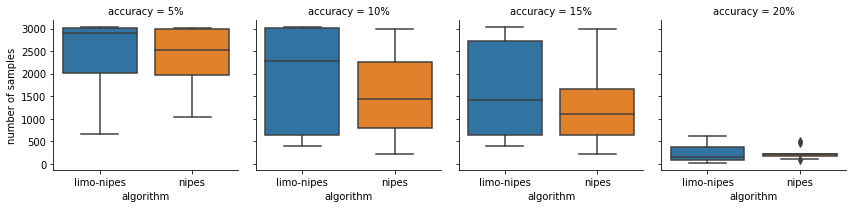

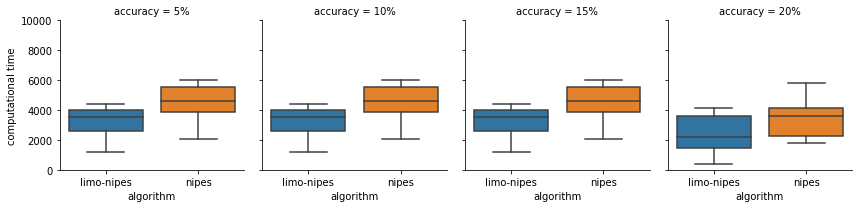

In [23]:
list_dir = ["/home/leni/are-logs/are_limonipes_easy/",
            "/home/leni/are-logs/are_nipes_easy/"]
type_exp = ["limo-nipes","nipes"]
maze_name =  ["easy race"]
lines = []
i = 0
for dire in list_dir :
    neval_list = []
    neval_list_10 = []
    neval_list_15 = []
    neval_list_20 = []
    time_list = []
    print(dire)
    for folder in os.listdir(dire) :
        if(not os.path.isdir(dire + folder) or folder.split("_")[0] != "nipes") :
            continue
            
        neval, best_fit, avg_fit,pop_size = load_all_fitnesses(dire + folder + "/fitnesses.csv",0)
        nbeval, eval_time = load_eval_time(dire + folder + "/eval_durations.csv")
        neval_10 = 0
        neval_15 = 0
        neval_20 = 0
        neval_list.append(neval[-1])

        time_list.append(sum(eval_time))
        for fit,ne in zip(best_fit,neval) :
            if(fit >= 0.90 or ne >= 3000) :
                neval_10 = ne
                break
        for fit,ne in zip(best_fit,neval) :        
            if(fit >= 0.85 or ne >= 3000) :
                neval_15 = ne
                break
        for fit,ne in zip(best_fit,neval) :        
            if(fit >= 0.8 or ne >= 3000) :
                neval_20 = ne
                break
        neval_list_10.append(neval_10)
        neval_list_15.append(neval_15)
        neval_list_20.append(neval_20)
        lines.append([sum(eval_time),neval[-1],"5%",type_exp[i]])
        lines.append([sum(eval_time[:int(neval_10)]),neval_10,"10%",type_exp[i]])
        lines.append([sum(eval_time[:int(neval_15)]),neval_15,"15%",type_exp[i]])
        lines.append([sum(eval_time[:int(neval_20)]),neval_20,"20%",type_exp[i]])
        
    print("5%",np.mean(neval_list),np.std(neval_list),np.mean(time_list),np.std(time_list))
    print("10%",np.mean(neval_list_10),np.std(neval_list_10),np.mean(time_list),np.std(time_list))
    print("15%",np.mean(neval_list_15),np.std(neval_list_15),np.mean(time_list),np.std(time_list))
    print("20%",np.mean(neval_list_20),np.std(neval_list_20),np.mean(time_list),np.std(time_list))
    i+=1
    
d = pd.DataFrame(data=lines,columns=["computational time","number of samples","accuracy","algorithm"])    
    
ax1 = sns.catplot(x="algorithm",y="number of samples",col="accuracy",data=d,kind="box",aspect=1,height=3)
ax2 = sns.catplot(x="algorithm",y="computational time",col="accuracy",data=d,kind="box",aspect=1,height=3)
ax2.set(ylim=[1,10000])

nipes_26_4_16-3-54-4074_2058271325


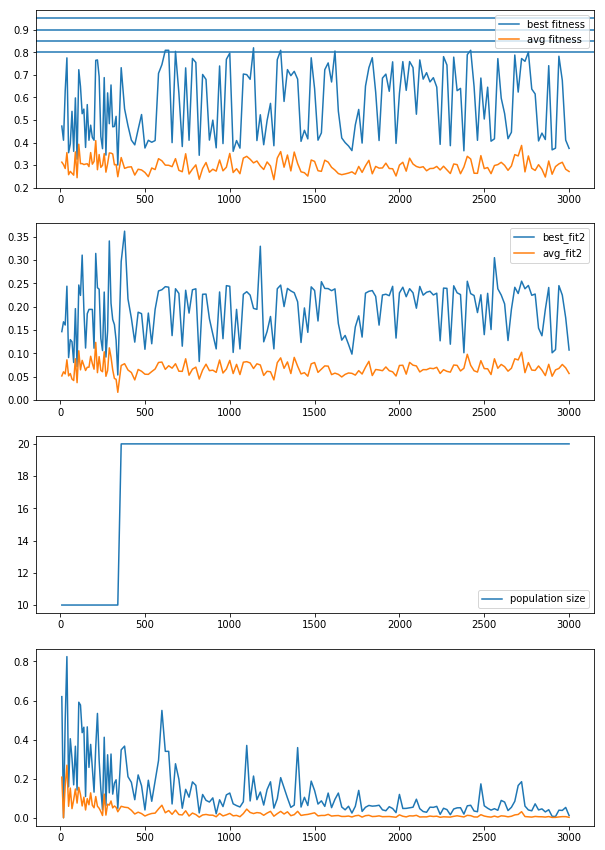

nipes_26_4_16-3-52-2935_2627878762


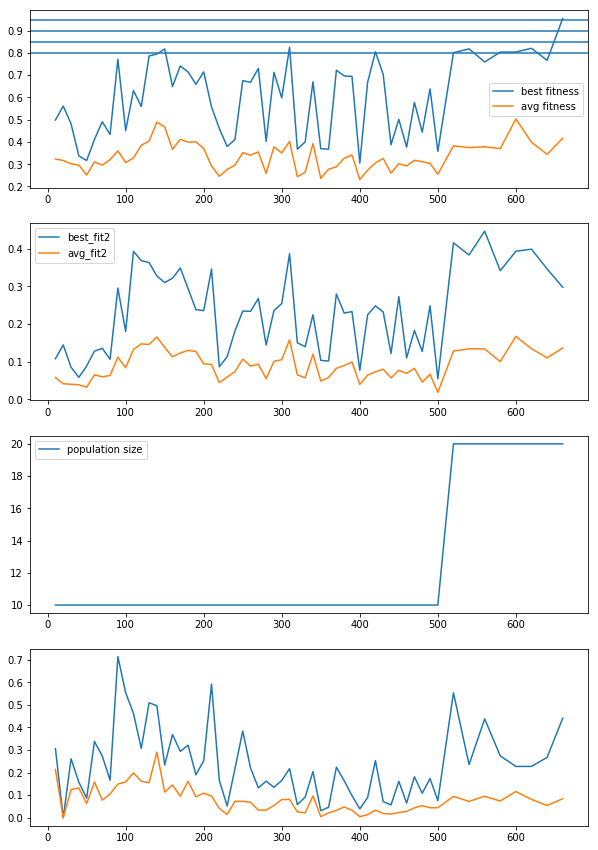

nipes_26_4_16-3-57-7982_940695413


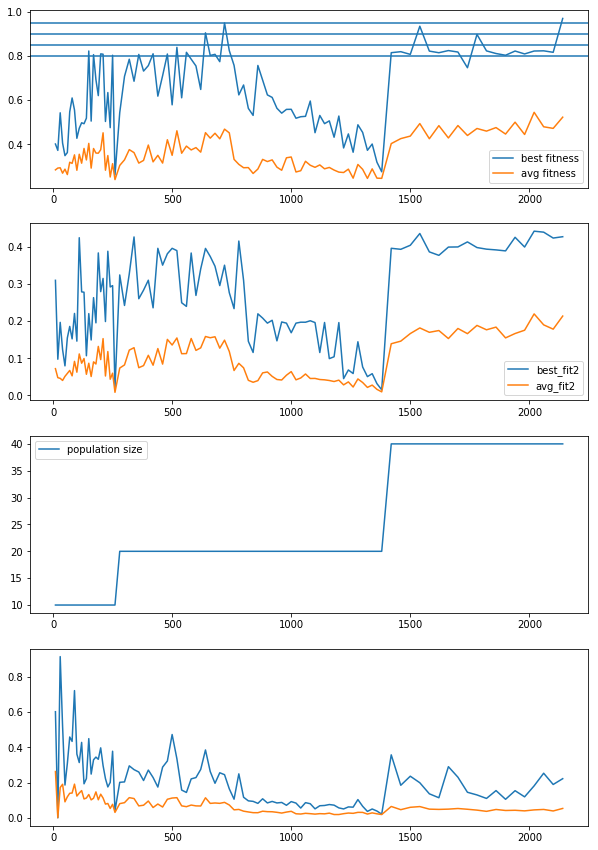

nipes_26_4_16-4-6-6970_1709404983


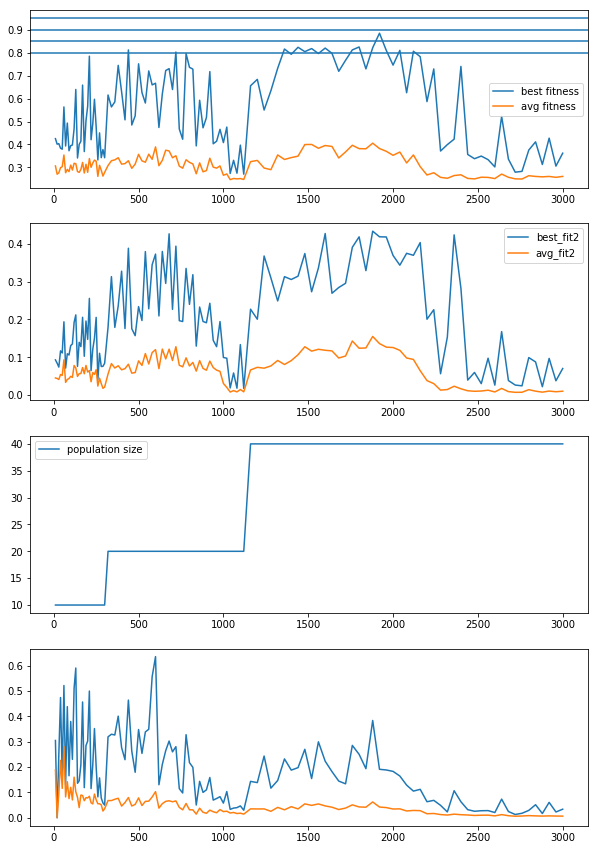

nipes_26_4_16-3-46-6452_3001916415


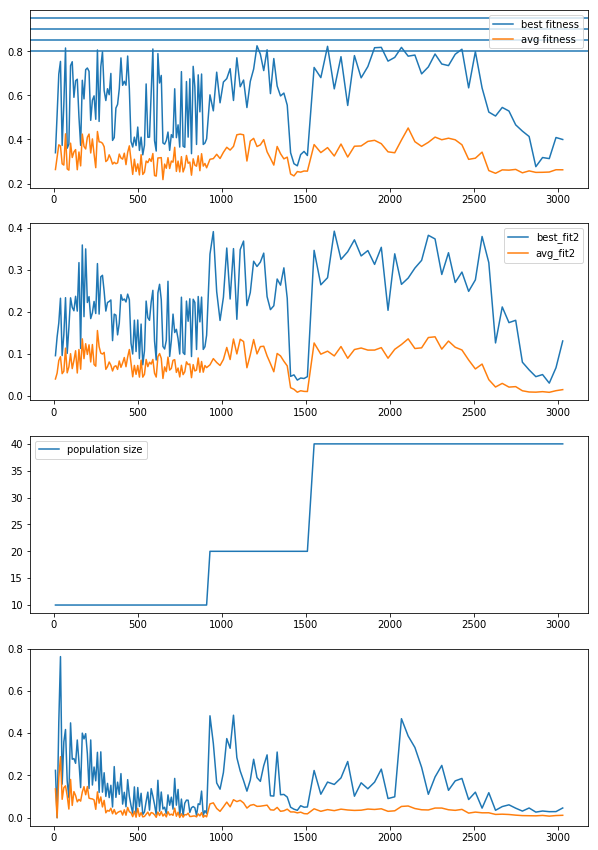

nipes_26_4_16-3-50-752_1827110158


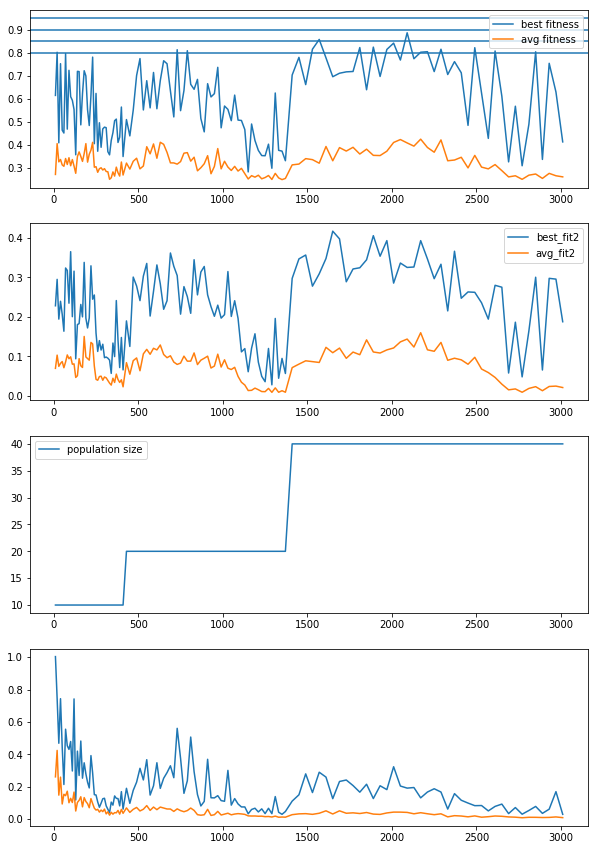

nipes_26_4_16-4-10-259_2975606049


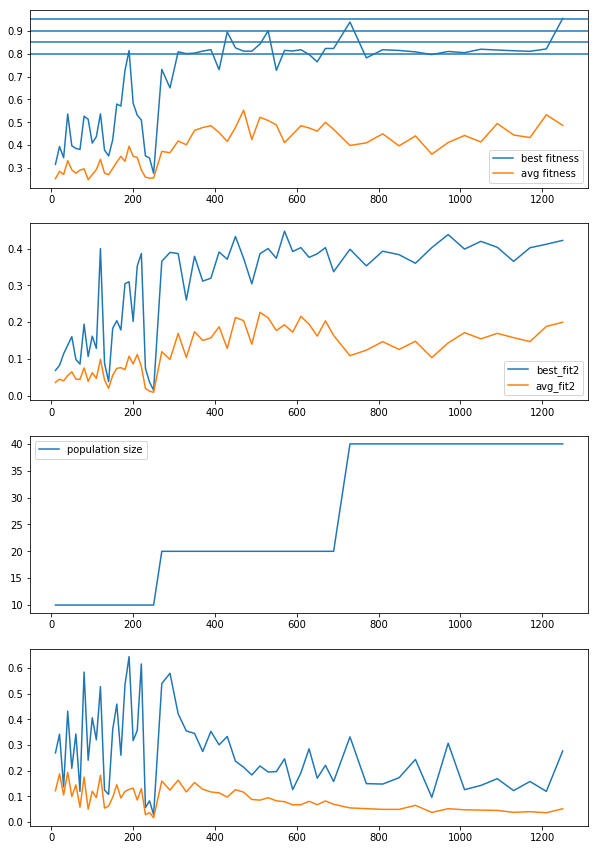

nipes_26_4_16-3-53-3133_2229945507


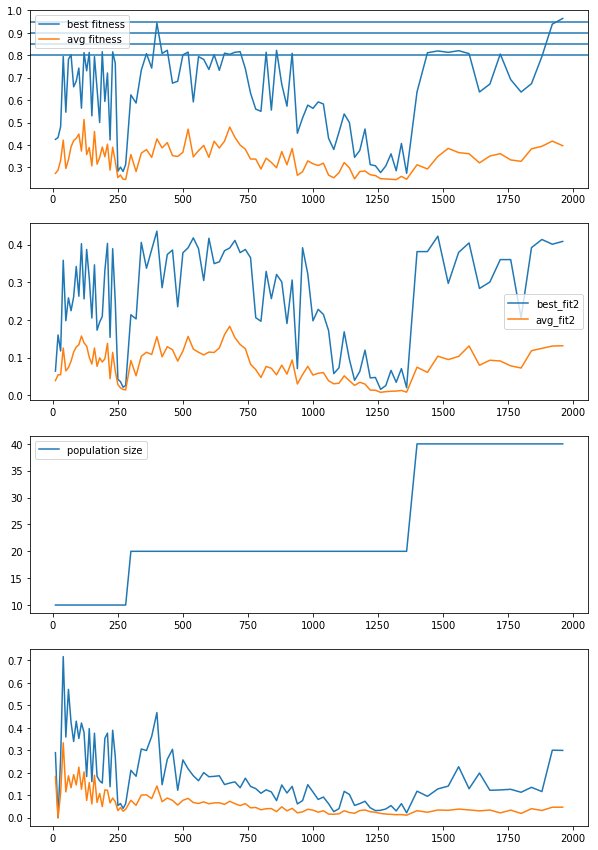

nipes_26_4_16-3-52-2099_1054044775


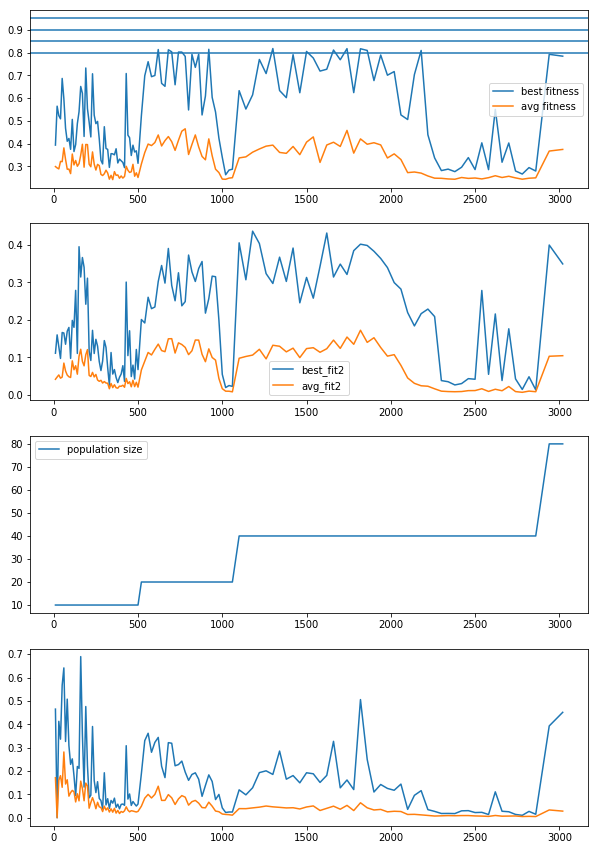

nipes_26_4_16-3-49-9450_2329576030


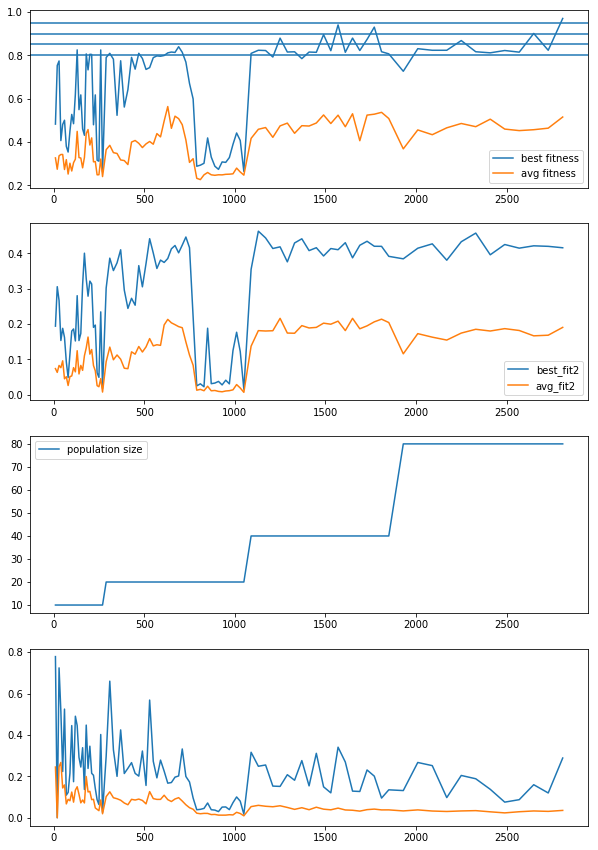

In [26]:
are_limonipes_easy = "/home/leni/are-logs/are_limonipes_easy/"
x_vec = []
y_vec = []
for folder in os.listdir(are_limonipes_easy) :
    if(not os.path.isdir(are_limonipes_easy + folder)) :
        continue
    print(folder)
    neval, best_fit, avg_fit,pop_size = load_all_fitnesses(are_limonipes_easy + folder + "/fitnesses.csv",0)
    neval, best_fit2, avg_fit2, pop_size = load_all_fitnesses(are_limonipes_easy + folder + "/fitnesses.csv",1)
    neval, best_nov, avg_nov,pop_size = load_all_fitnesses(are_limonipes_easy + folder + "/fitnesses.csv",2)
    nbeval, eval_time = load_eval_time(are_limonipes_easy + folder + "/eval_durations.csv");

    
    gain = [(best_fit[i] - best_fit[i-1])/eval_time[i-1] for i in range(1,len(best_fit))]

    fig = plt.figure(figsize=[10,15])
    ax1 = fig.add_subplot(4,1,1)
    ax2 = fig.add_subplot(4,1,3)
    ax3 = fig.add_subplot(4,1,2)
    ax4 = fig.add_subplot(4,1,4)

#    ax1.set_ylim(0.4,1)
#    ax3.set_ylim(0.0,0.5)
    ax1.plot(neval,best_fit,label="best fitness")
    
    ax1.plot(neval,avg_fit,label="avg fitness")
    ax1.axhline(y=0.95)
    ax1.axhline(y=0.9)
    ax1.axhline(y=0.85)
    ax1.axhline(y=0.80)
    
    ax2.plot(neval,pop_size,label="population size")
    ax4.plot(neval,best_nov,label="best_nov")
    ax4.plot(neval,avg_nov,label="avg_nov")
    ax3.plot(neval,best_fit2,label="best_fit2")
    ax3.plot(neval,avg_fit2,label="avg_fit2")
   # ax5.plot(eval_durations)

    
    ax1.legend()
    ax2.legend()
    ax3.legend()
    plt.show()
    #animation_pop(are_ipop_hard_pst005 + folder,pop_size,1)